In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('2008_swing_states.csv')
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


Text(0,0.5,'Presentasi suara untuk Obama')

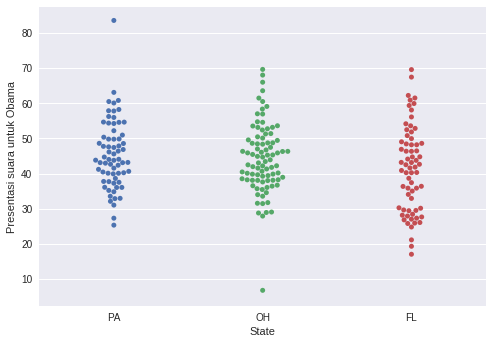

In [3]:
sns.swarmplot(x='state', y='dem_share', data=df)
plt.xlabel('State')
plt.ylabel('Presentasi suara untuk Obama')

## Mean

In [4]:
state_name = ['PA', 'OH', 'FL']
state_data = []
for x in state_name:
    data = df[df['state'] == x]['dem_share']
    state_data.append(data)
    

In [5]:
for i, x in enumerate(state_data):
    print("Rata rata dari %s adalah: %s" % (state_name[i], np.mean(x)))

Rata rata dari PA adalah: 45.476417910447765
Rata rata dari OH adalah: 44.31818181818181
Rata rata dari FL adalah: 41.32507462686568


# $ mean = \bar{x} = \frac{1}{n}\sum_{n=i}^{n} x_i $

In [6]:
np.mean(df['dem_share'])

43.76441441441444

## Outlier

In [7]:
df_all = pd.read_csv('2008_all_states.csv')
df_all.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [8]:
data_ut = df_all[df_all['state'] == 'UT']['dem_share']

Text(0,0.5,'Suara untuk Obama')

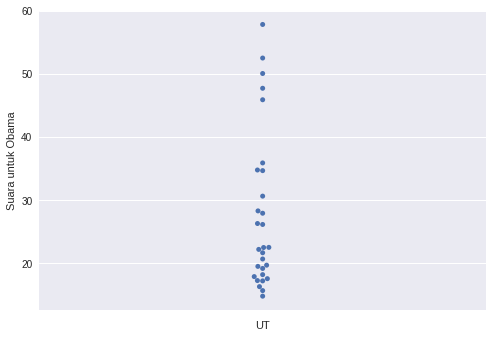

In [9]:
sns.swarmplot(y=data_ut)
plt.xlabel('UT')
plt.ylabel('Suara untuk Obama')

In [10]:
np.mean(data_ut)

27.61103448275862

In [11]:
np.median(data_ut)

22.469999999999999

In [12]:
np.array(sorted(data_ut))

array([ 14.76,  15.64,  16.27,  17.18,  17.23,  17.53,  17.86,  18.17,
        19.15,  19.48,  19.67,  20.65,  21.64,  22.17,  22.47,  22.49,
        26.12,  26.27,  27.9 ,  28.27,  30.61,  34.65,  34.75,  35.87,
        45.88,  47.7 ,  50.04,  52.49,  57.81])

In [13]:
len(data_ut)

29

## Persentil dalam ECDF

In [14]:
import dc_stat_think as dcst

In [15]:
x, y = dcst.ecdf(df['dem_share'])

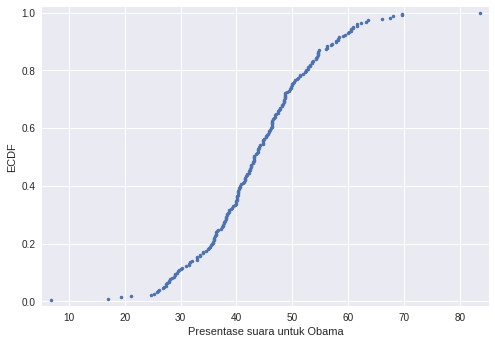

In [16]:
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Presentase suara untuk Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges

In [17]:
np.percentile(df['dem_share'], [25, 50, 75])

array([ 37.3025,  43.185 ,  49.925 ])

## Box Plot

Text(0,0.5,'Presentase suara untuk Obama')

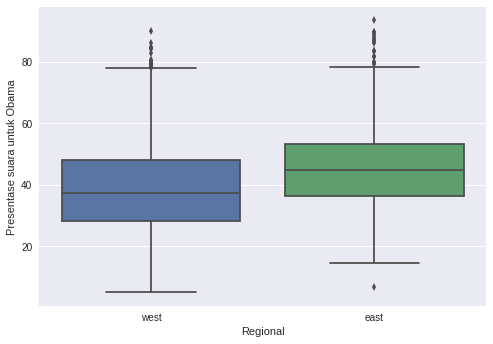

In [18]:
sns.boxplot(x='east_west', y='dem_share',
data=df_all)
plt.xlabel('Regional')
plt.ylabel('Presentase suara untuk Obama')

## Varians dan Standard Deviasi

Text(0,0.5,'Presentasi suara untuk Obama')

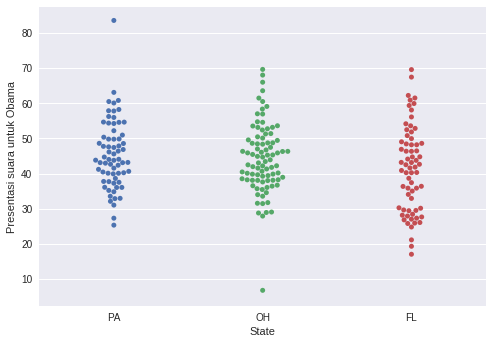

In [19]:
sns.swarmplot(x='state', y='dem_share', data=df)
plt.xlabel('State')
plt.ylabel('Presentasi suara untuk Obama')

### Varians
- Jarark akar kuadarat dari meannya
- Secara informal  merupakan ukuran dari sebaran data

In [20]:
data_pa = df[df['state'] == 'PA']['dem_share']
data_oh = df[df['state'] == 'OH']['dem_share']
data_fl = df[df['state'] == 'FL']['dem_share']

Text(0,0.5,'Presentasi suara untuk Obama')

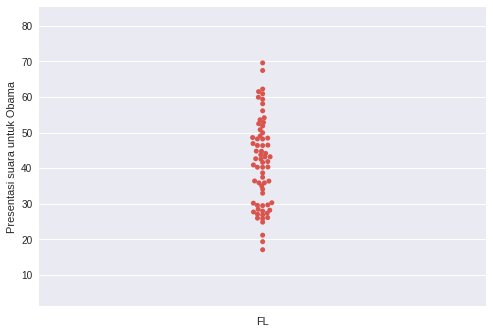

In [21]:
sns.swarmplot(y=data_fl, color= sns.xkcd_rgb["pale red"])
plt.margins(0.3)
plt.xlabel('FL')
plt.ylabel('Presentasi suara untuk Obama')

# $ varians = \frac{1}{n}\sum_{n=i}^{n} (x_i - \bar{x})^2 $

In [22]:
np.var(data_fl)

147.44278618846064

In [23]:
print(np.std(data_fl))
print(np.sqrt(np.var(data_fl)))

12.142602117687158
12.1426021177


# Kovarians dan Korelasi Koefisien Pearson

In [24]:
df_all.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


Text(0,0.5,'percent of vote for Obama')

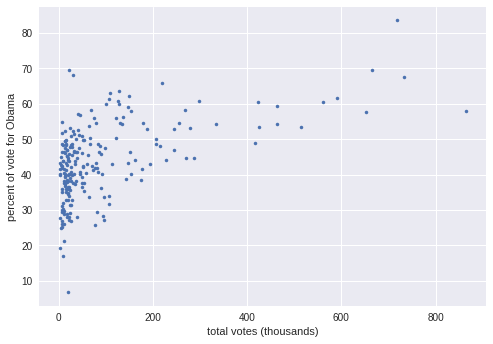

In [25]:
plt.plot(df['total_votes']/1000, df['dem_share'], marker='.', linestyle='none')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')

Text(0,0.5,'Presentase Suara untuk Obama')

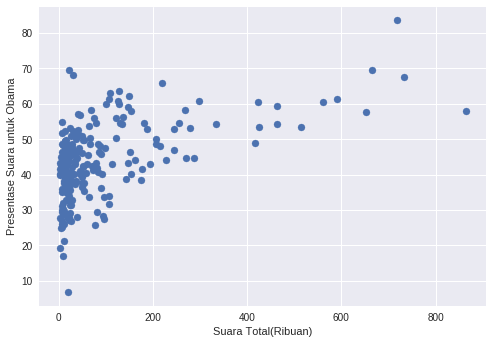

In [26]:
plt.scatter(df['total_votes']/1000, df['dem_share'])
plt.xlabel('Suara Total(Ribuan)')
plt.ylabel('Presentase Suara untuk Obama')

## Kovarians
- Mengukur dua variabel bervariasi bersama

In [32]:
np.cov(df['total_votes']/1000, df['dem_share'])[0,1]

817.30936184052882

# $ kovarians = \frac{1}{n}\sum_{n=i}^{n} (x_i - \bar{x})(y_i - \bar{y}) $

## Korelasi Koefisien Pearson

### $ \rho = Pearson Correlation $

### $ = \frac{Kovarians}{(std of x)(std of y)}$

$ = \frac{Variasidari kodepedensi}{Variabel Independen}$

In [38]:
np.cov(df['total_votes']/1000, df['dem_share']) / (np.std(df['total_votes']/1000) * np.std(df['dem_share']))

array([[ 13.34193785,   0.5386236 ],
       [  0.5386236 ,   0.07563146]])

In [29]:
np.corrcoef(df['total_votes']/1000, df['dem_share'])

array([[ 1.        ,  0.53619736],
       [ 0.53619736,  1.        ]])

In [30]:
from scipy.stats import pearsonr

In [31]:
pearsonr(df['total_votes']/1000, df['dem_share'])

(0.5361973649586782, 6.3389115683217516e-18)